  # Black friday sales analysis

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


About this file:-
    
Data Variable Definition:-

1) User_ID                    - User ID
2) Product_ID                 - Product ID
3) Gender                     - Sex of User
4) Age                        - Age in bins
5) Occupation                 - Occupation (Masked)
6) City_Category              - Category of the City (A,B,C)
7) Stay_In_Current_City_Years - Number of years stay in current city
8) Marital_Status             - Marital Status
9) Product_Category_1         - Product Category (Masked)
10) Product_Category_2        - Product may belongs to other category also (Masked)
11) Product_Category_3        - Product may belongs to other category also (Masked)
12) Purchase                  - Purchase Amount (Target Variable)

## Task 2

### "Perform Data cleaning and Exploratory Data analysis (EDA) on a Dataset of your choice,such as Titanic dataset from kaggle. Explore the relationships between variables and identify the patterns and trends in the data."

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Understanding the Data

In [4]:
df.shape

(550068, 12)

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [40]:
df_num = df.select_dtypes(include = 'number')
df_num.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,10,0,3,9.842329,8370
1,1000001,10,0,1,6.000000,15200
2,1000001,10,0,12,9.842329,1422
3,1000001,10,0,12,14.000000,1057
4,1000002,16,0,8,9.842329,7969


### Handling Missing Values


In [7]:
df.isnull().sum()/len(df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [8]:
mean_df = df['Product_Category_2'].mean()

In [9]:
# since there are only 31% of null values present in 'Product_Category_2' we can impute 'mean' to the null values

df['Product_Category_2'].fillna(mean_df, inplace=True)

In [10]:
df.isnull().sum()/len(df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2             0.000000
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

There is 69.8% of null values present in the Product_Category_3 so there is no use in keeping it so we can drop that column

### Data Cleaning

In [11]:
df = df.drop(['Product_Category_3'],axis = 1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,7969


In [12]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

Now,there are no null values in the dataset

### Exploring Distribution

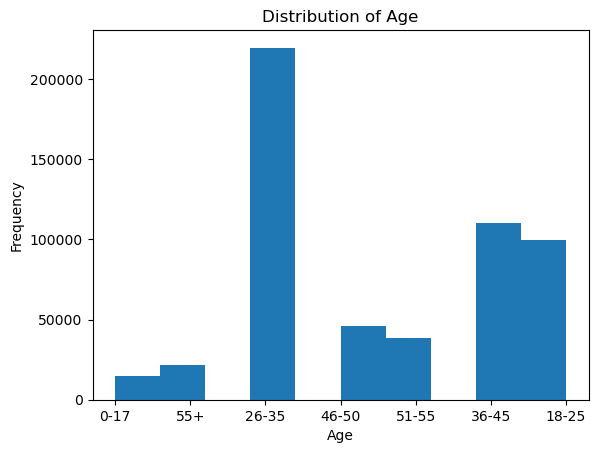

In [18]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


* The distribution of age between 26-35 is high
* Hence we infer that,Many people between the ages of 26 and 35 are shopping a lot during the Black Friday sale.

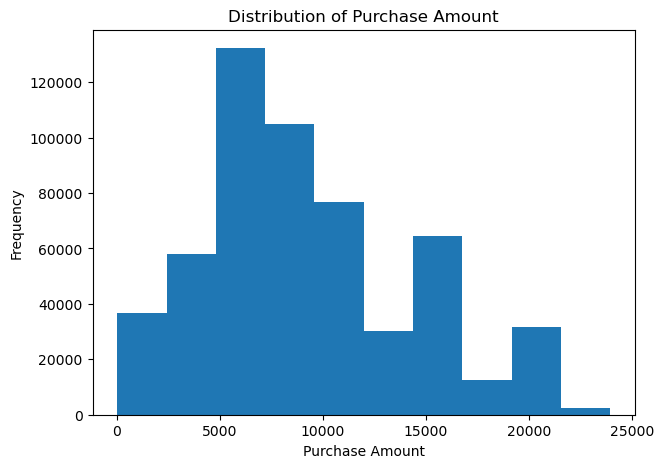

In [31]:
plt.figure(figsize = (7,5))
plt.hist(df['Purchase'],bins = 10)
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount')
plt.show()


* The point where most people are shopping is between Rs.5000 and Rs.10000 in total purchase amount.


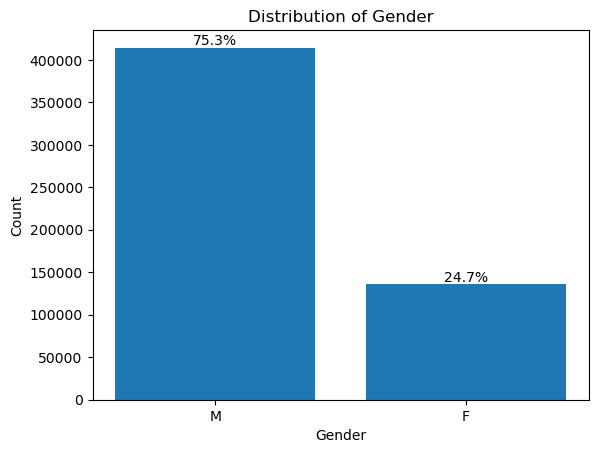

In [47]:
gender_counts = df['Gender'].value_counts()

# Plotting the bar chart
bars = plt.bar(gender_counts.index, gender_counts.values)

total = sum(gender_counts)
for bar in bars:
# bar.get_height() is used to retrieve the height of each bar in the bar chart. 
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')
             
# Adding title and labels
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

* From this we can infer that comparing to female , males are shopping more


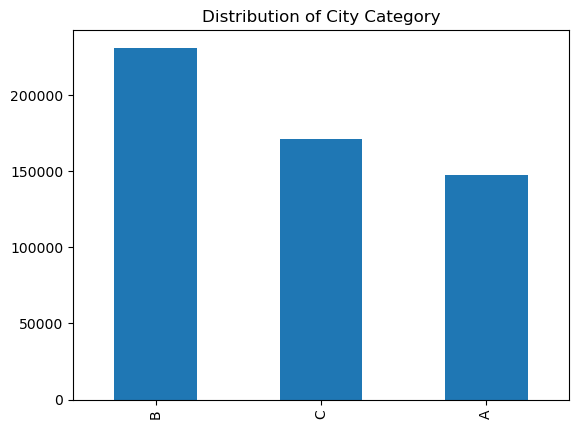

In [34]:
df['City_Category'].value_counts().plot(kind = 'bar')
plt.title('Distribution of City Category')
plt.show()

* from this above barchart we come to know that most of the people based on City_category-'B'

### Checking for outliers

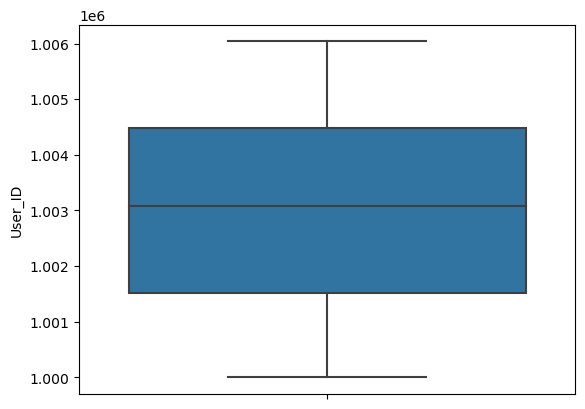

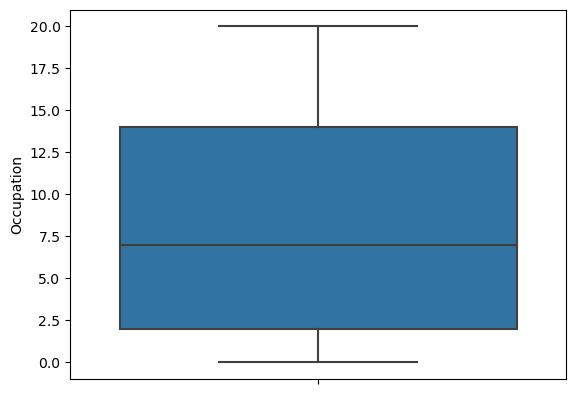

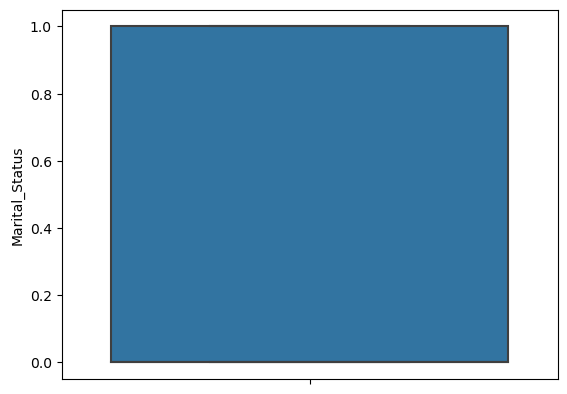

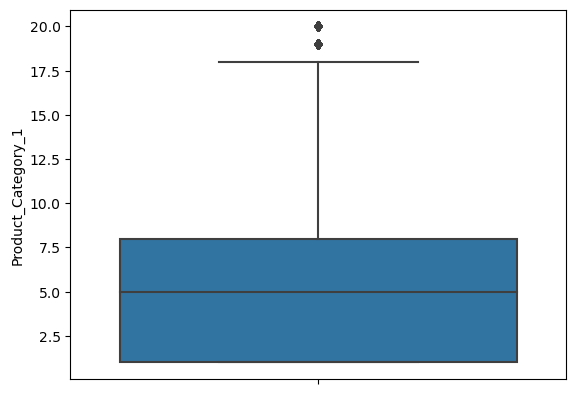

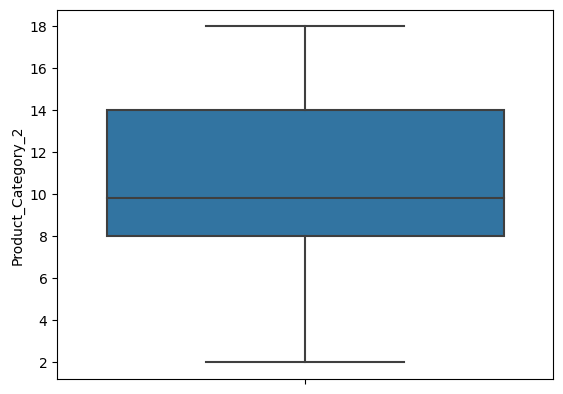

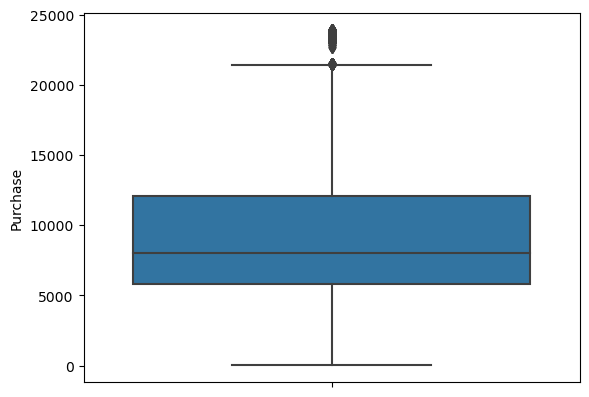

In [41]:
for i in df_num:
    sns.boxplot(y = df[i])
    plt.show()

In [42]:
# there are very less outliers so we don't want to treat it

###  Relationships between variables

In [37]:
# Correlation matrix for numerical variables
correlation_matrix = df.corr()
print(correlation_matrix)


                     User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023971        0.020443            0.003825   
Occupation         -0.023971    1.000000        0.024280           -0.007618   
Marital_Status      0.020443    0.024280        1.000000            0.019888   
Product_Category_1  0.003825   -0.007618        0.019888            1.000000   
Product_Category_2  0.001267   -0.000317        0.012507            0.373686   
Purchase            0.004716    0.020833       -0.000463           -0.343703   

                    Product_Category_2  Purchase  
User_ID                       0.001267  0.004716  
Occupation                   -0.000317  0.020833  
Marital_Status                0.012507 -0.000463  
Product_Category_1            0.373686 -0.343703  
Product_Category_2            1.000000 -0.179309  
Purchase                     -0.179309  1.000000  


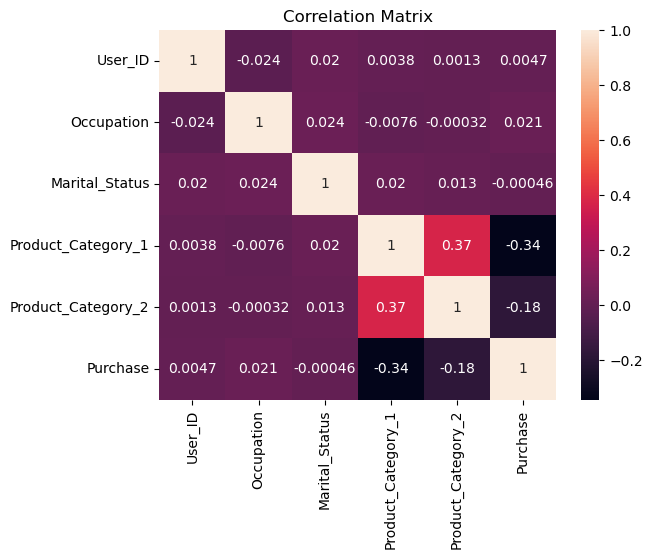

In [43]:
# Heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


* there is no high correlation between any variables
* There is medium correlation between Product_Category_1 and Product_Category_2 